# Equation du temps et analemme

## Description

La mesure du temps est effectuée de nos jours par des **horloges atomiques** avec une **extrême précision**. Une autre référence de temps est donnée par **la vitesse de rotation de la Terre sur elle-même** , qui est relativement stable.

Cette vitesse n’est cependant pas rigoureusement constante, car il faut parfois insérer une seconde au temps UTC (celui de nos montres) pour que la durée du **jour solaire moyen** reste égale à … 24h ! La diminution **très lente** de cette vitesse en est notamment la cause.

Mais considérons-là constante pour définir le **temps solaire moyen**. Il correspond à un "Soleil moyen" qui aurait une **orbite circulaire** à vitesse constante, de même période que l’orbite elliptique du "Soleil vrai" autour de la Terre, mais cette fois dans le plan équatorial.

Il s’agit juste d’avoir une référence de temps avec des jours qui durent tous 24h. Mais la Terre a une **orbite elliptique** et son axe de rotation est incliné par rapport au plan de l’écliptique. Ce qu’on appelle alors **le temps solaire vrai** sera alors un peu différent …

On se propose d'évaluer ici **l'équation du temps** qui est la différence entre le **temps solaire moyen** et le **temps solaire vrai**. Il sera ensuite possible de représenter la position du "Soleil vrai" dans le ciel, donc **l'analemme** au midi solaire moyen.

Différentes configurations sont testées :
* orbite vraie
* orbite circulaire et inclinaison non nulle
* orbite elliptique et inclinaison nulle


## Calculs

On se place dans le [référentiel géocentrique](https://media4.obspm.fr/public/ressources_lu/pages_reperes/referentiel-apprendre.html), avec un repère $OXYZ$ ($OX$ axe dirigé vers le [point vernal](https://acces.ens-lyon.fr/acces/thematiques/paleo/variations/tp-milankovitch/point_vernal), $OXY$ plan équatorial, $OZ$ axe de rotation de la Terre).

Dans ce repère $OXYZ$, on considère un autre repère $OXyz$, où $OXy$ est [l'écliptique](https://fr.wikipedia.org/wiki/%C3%89cliptique), incliné d'un angle $\epsilon$. Dans le plan de l'équateur $OXY$ et l'écliptique $OXy$, la référence commune pour les angles sera donc l'axe $OX$.

Dans le plan $OXy$, le "Soleil vrai" a une longitude écliptique

$$\lambda_V=W+V$$

où $W$ est la longitude écliptique du Soleil au périhélie et $V$ est [l'anomalie vraie](https://fr.wikipedia.org/wiki/Anomalie_vraie).

Dans le plan $OXY$, le "Soleil moyen" a une "longitude équatoriale" (le terme plus approprié serait plutôt ascension droite)

$$\lambda_M=W+M$$

où $M$ est cette fois [l'anomalie moyenne](https://fr.wikipedia.org/wiki/Anomalie_moyenne), proportionnelle au temps.

L'anomalie moyenne $M$ permet d'obtenir l'anomalie vraie $V$ grâce à la résolution de [l'équation de Képler](https://www.youtube.com/watch?v=QbxsBTaJXW0).

Dans le repère $OXyz$, le vecteur unitaire qui pointe vers le "Soleil vrai" est

$$\vec d_V=[\cos(\lambda_V),\sin(\lambda_V),0]$$

Dans le repère $OXYZ$, le vecteur unitaire qui pointe vers le "Soleil moyen" est

$$\vec d_M=[\cos(\lambda_M),\sin(\lambda_M),0]$$

Exprimons les coordonnées du vecteur $\vec d_V$ dans le repère $OXYZ$. On obtient

$$\vec d_V=[\cos(\lambda_V),\cos(\epsilon)\sin(\lambda_V),\sin(\epsilon)\sin(\lambda_V)]$$

Si on veut les coordonnées angulaires classiques de ce vecteur, avec une ascension droite $\lambda_V^\prime$ et une déclinaison $\delta$, il faut considérer son autre expression

$$\vec d_V=[\cos(\delta)\cos(\lambda_V^\prime),\cos(\delta)\sin(\lambda_V^\prime),\sin(\delta)]$$

On en déduit que $\sin(\delta)=\sin(\epsilon)\sin(\lambda_V)$, ce qui nous permet d'accéder à la valeur de $\delta$.

Ce qui nous intéresse maintenant est l'écart d'angle $\Delta\lambda$ entre les ascensions droites du "Soleil moyen" et du "Soleil vrai". Il faut donc se placer dans le plan $OXY$ et donc considérer un vecteur $\vec d_V^\prime$ qui sera la projection du vecteur $\vec d_V$ sur ce plan.

$$\vec d_M=[\cos(\lambda_M),\sin(\lambda_M),0]$$

$$\vec d_V^\prime=[\cos(\lambda_V),\cos(\epsilon)\sin(\lambda_V),0]$$

Une astuce pour éviter les calculs d'arctangente consiste à calculer le produit vectoriel
$$\vec d_M \wedge \vec d_V^\prime=[0,0,\cos(\lambda_M)\sin(\lambda_V)\cos(\epsilon)-\sin(\lambda_M)\cos(\lambda_V)]=[0,0,\lVert \vec d_M \lVert.\lVert \vec d_V^\prime \lVert.\sin(\Delta\lambda)]$$

avec $\lVert \vec d_M \lVert=1$ et $\lVert \vec d_V^\prime \lVert=\cos(\delta)$.

Au final, on obtient **l'équation du temps** $\Delta\lambda$ en angle :

$$\delta=\arcsin\left(\sin(\epsilon)\sin(\lambda_V)\right)$$

$$\Delta\lambda=\arcsin\left(\frac{\cos(\lambda_M)\sin(\lambda_V)\cos(\epsilon)-\sin(\lambda_M)\cos(\lambda_V)}{\cos(\delta)}\right)$$

Pour obtenir l'équation du temps $\Delta T$ en minutes, il suffit de diviser $\Delta\lambda$ par la vitesse de rotation de la Terre sur elle-même qui est de 15 degrés par heure soit $\dfrac{1}{4}$ de degré par minute :

$$\Delta T=4\Delta\lambda$$




## Sources

Une descrition plus complète est disponible dans cette [vidéo explicative](https://www.youtube.com/watch?v=ijLz8fNAPSE).

Pour les données astronomiques (anomalie moyenne au 1er janvier 2024 et longitude écliptique du périhélie), on peut se référer au [notebook](https://colab.research.google.com/drive/1_HXRntcp7QIRlbzi_RP3f7F3IG7AOJN7?usp=sharing) concernant l'éclairement du Soleil.

Pour d'autres informations, [la page Wikipédia](https://fr.wikipedia.org/wiki/%C3%89quation_du_temps) est disponible.

## Le programme

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# L'anomalie moyenne M (en radian), proportionnelle au temps, permet
# d'obtenir l'anomalie excentrique E (en radian)
# (résolution itérative de l'équation de Kepler M=E-e*sin(E))
# puis l'anomalie vraie V (en radian)


def eq_kepler(M, e):
    E = np.pi
    M = np.remainder(M, 2*np.pi)
    for n in range(5):
        E = (M-e*(E*np.cos(E)-np.sin(E)))/(1-e*np.cos(E))
    return E


def calc_anom_vraie(E, e):
    V = 2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))
    return V

# Epsilon : inclinaison de l'axe de rotation terrestre (en degré)
# W : longitude écliptique du Soleil au périhélie (en degré)
# M0 : anomalie moyenne au 1er janvier (en degré)
# e : excentricité de l'orbite terrestre
# Les paramètres par défaut sont ceux permettant de décrire
# le mouvement apparent du Soleil au cours d'une année.


def calc_eqt(Epsilon=23.44, W=282.99, M0=356.83, e=0.0167):
    Epsilon = Epsilon*np.pi/180.0
    W = W*np.pi/180
    pas_calc = 0.1
    M = np.pi*(np.arange(0, 360, pas_calc)+M0)/180
    E = [eq_kepler(Ml, e) for Ml in M]
    V = np.array([calc_anom_vraie(El, e) for El in E])
    lambda_V = W+V
    lambda_M = W+M
    Delta = np.arcsin(np.sin(Epsilon)*np.sin(lambda_V))
    DL = np.arcsin((np.cos(lambda_M)*np.sin(lambda_V)*np.cos(Epsilon) -
                    np.sin(lambda_M)*np.cos(lambda_V))/np.cos(Delta))
    DL = 180*DL/np.pi
    Delta = 180*Delta/np.pi
    M = M*180/np.pi
    return DL, Delta, M, M0


def trace_eqt_ana(DL, Delta, M, M0):
    T = 365.25
    temps = (M-M0)*T/360
    DT = 60*DL/15
    jour_mois = [(date(2024, n, 1)-date(2024, 1, 1)
                  ).days for n in range(1, 13)]
    nom_mois = ['1er janvier', '1er février', '1er mars', '1er avril', '1er mai', '1er juin',
                '1er juillet', '1er août', '1er septembre', '1er octobre', '1er novembre', '1er décembre']
    index_mois = [np.where(temps >= jour_mois[n])[0][0]
                  for n in range(len(jour_mois))]

    fig, ax = plt.subplots()
    ax.plot(temps, DT)
    ax.set_xlabel('Date (année 2024)')
    ax.set_ylabel('Temps solaire moyen - temps solaire vrai (en mn)')
    ax.set_title('Equation du temps')
    ax.set(xlim=(0, T))
    plt.xticks(temps[index_mois], labels=nom_mois, rotation=90)
    plt.yticks(np.arange(2*np.floor(min(DT)/2),
               2+2*np.ceil(max(DT)/2), 2))
    plt.grid('on')

    fig, ax = plt.subplots()
    ax.plot(DL, Delta)
    ax.scatter(DL[index_mois], Delta[index_mois], color='k')
    for n in range(len(index_mois)):
        plt.text(DL[index_mois[n]], Delta[index_mois[n]], nom_mois[n], ha='center', va='bottom', color='r',
                 fontsize=8, weight='bold', alpha=1)
    ax.set_xlabel('Ecart ascension droite (°)')
    ax.set_ylabel('Déclinaison (°)')
    ax.set_title('Analemme (coordonnées équatoriales)')
    ax.invert_xaxis()
    plt.xticks(np.arange(np.floor(min(DL)),
               1+np.ceil(max(DL))))
    plt.yticks(np.arange(10*np.floor(min(Delta)/10),
               10+10*np.ceil(max(Delta)/10), 10))
    plt.grid('on')

    plt.show()


## Orbite vraie

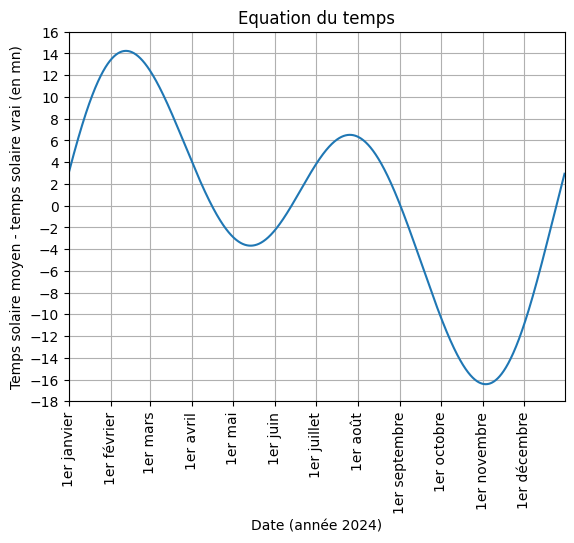

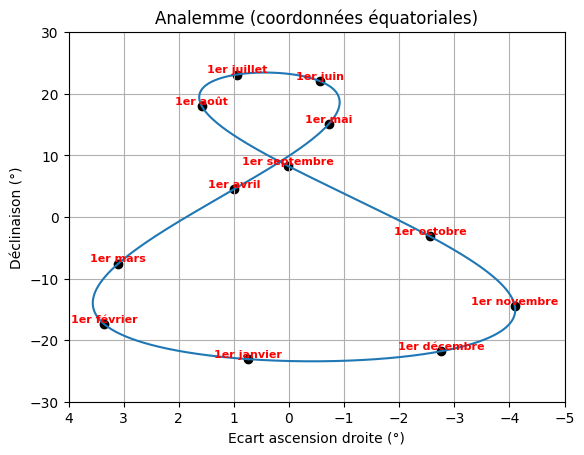

In [ ]:
DL, Delta, M, M0 = calc_eqt(
    Epsilon=23.44, W=282.99, M0=356.83, e=0.0167)
trace_eqt_ana(DL, Delta, M, M0)

## Orbite circulaire et inclinaison de 23.44 degré

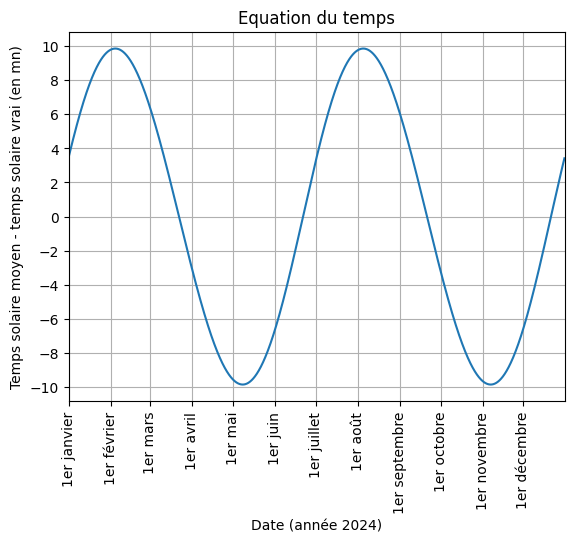

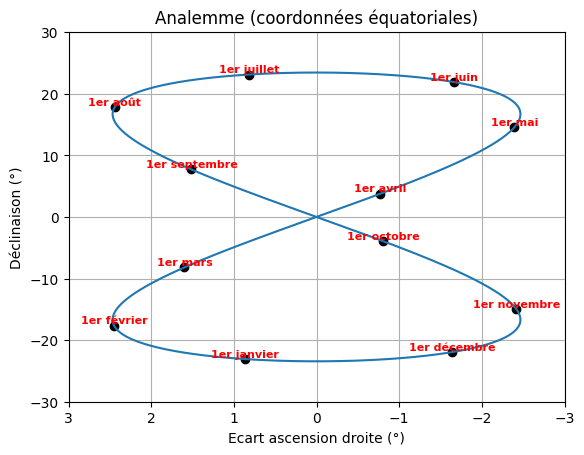

In [ ]:
DL, Delta, M, M0 = calc_eqt(
    Epsilon=23.44, W=282.99, M0=356.83, e=0.0)
trace_eqt_ana(DL, Delta, M, M0)

## Inclinaison nulle et orbite elliptique (e=0.0167)

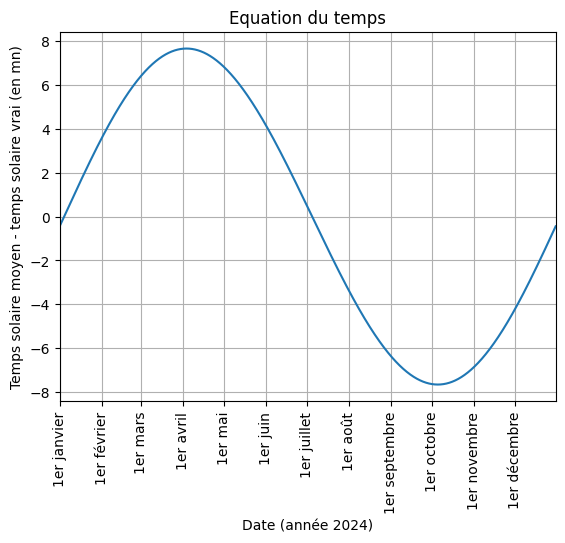

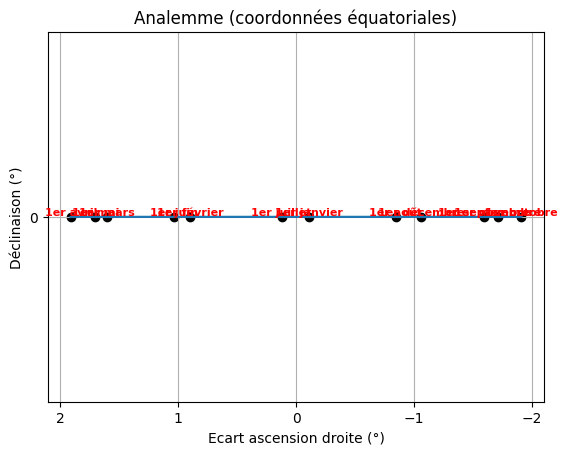

In [ ]:
DL, Delta, M, M0 = calc_eqt(
    Epsilon=0.0, W=282.99, M0=356.83, e=0.0167)
trace_eqt_ana(DL, Delta, M, M0)